# Performance Task Assessment

## Part 1

### 1. Load dataset

First, I will load the student roster and coursework data into this notebook to begin the analysis.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the datasets directly with filenames
roster_data = pd.read_excel('/Users/bigtobi/Library/Mobile Documents/com~apple~CloudDocs/Personal/Grad School/Education Pioneers/Projects/ContigoEd/Sample Graduation Roster vF.xlsx')
coursework_data = pd.read_csv('/Users/bigtobi/Library/Mobile Documents/com~apple~CloudDocs/Personal/Grad School/Education Pioneers/Projects/ContigoEd/Sample Coursework Data vF.csv')

# Display the first few rows of each dataset to understand their structure
display(roster_data.head())
display(coursework_data.head())

,Student ID,Race / Ethnicity,Gender,Economically Disadvantaged,SpedStatus,Campus
0,1,4 - African American,F,NaN,Y,Campus A
1,2,4 - African American,F,NaN,NaN,Campus A
2,3,6 - White,M,NaN,Y,Campus D
3,4,4 - African American,F,NaN,NaN,Campus B
4,5,4 - African American,F,NaN,NaN,Campus D


,studentID,grade,serviceID,courseDescription,subject,ap,dualCredit,g/t,honors,onRamps,courseCredits,creditsEarned,creditsFailed
0,1,10,NaN,LIAISON,MSC,N,N,N,N,N,0.0,0.0,0.0
1,1,11,13009900,CTE PROFESSIONAL COMMUNICATION,CTE,N,N,N,N,N,1.0,1.0,0.0
2,1,10,3440200,FL SPANISH 2,LOT,N,N,N,N,N,1.0,1.0,0.0
3,1,11,13037100,CTE PRIN TECH,CTE,N,N,N,N,N,1.0,1.0,0.0
4,1,11,3100600,ALGEBRA 2,AG2,N,N,N,N,N,1.0,1.0,0.0


#### Inspect the column names of both datasets

- Inspect the column names and data types to ensure consistency
- Clean any discrepancies, such as extra spaces in column names

In [2]:

print("Roster Data Columns:")
print(roster_data.columns)

print("\nCoursework Data Columns:")
print(coursework_data.columns)

# Clean any discrepancies in column names (e.g., remove trailing spaces)
roster_data.columns = roster_data.columns.str.strip()

# Verify the cleaned column names
print("\nCleaned Roster Data Columns:")
print(roster_data.columns)


Roster Data Columns:
Index(['Student ID ', 'Race / Ethnicity', 'Gender',
       'Economically Disadvantaged', 'SpedStatus', 'Campus'],
      dtype='object')

Coursework Data Columns:
Index(['studentID', 'grade', 'serviceID', 'courseDescription', 'subject', 'ap',
       'dualCredit', 'g/t', 'honors', 'onRamps', 'courseCredits',
       'creditsEarned', 'creditsFailed'],
      dtype='object')

Cleaned Roster Data Columns:
Index(['Student ID', 'Race / Ethnicity', 'Gender',
       'Economically Disadvantaged', 'SpedStatus', 'Campus'],
      dtype='object')


### 2. Calculate advanced coursework and merge the datasets
To merge the datasets and calculate the number of AP, Dual Credit, and OnRamps courses each student has taken:

In [3]:
# Calculate the number of AP, Dual Credit, and OnRamps courses based on credits earned
advanced_course_counts = coursework_data.groupby('studentID').agg(
    AP_courses=('creditsEarned', lambda x: x[coursework_data['ap'] == 'Y'].sum()),
    Dual_Credit_courses=('creditsEarned', lambda x: x[coursework_data['dualCredit'] == 'Y'].sum()),
    OnRamps_courses=('creditsEarned', lambda x: x[coursework_data['onRamps'] == 'Y'].sum())
).reset_index()

# Calculate the total number of advanced courses
advanced_course_counts['total_advanced_courses'] = (
    advanced_course_counts['AP_courses'] +
    advanced_course_counts['Dual_Credit_courses'] +
    advanced_course_counts['OnRamps_courses']
)

# Merge these counts back into the roster data
roster_with_advanced_courses = pd.merge(roster_data, advanced_course_counts, left_on='Student ID', right_on='studentID', how='left')

# Fill NaN values with 0 (for students with no advanced courses)
roster_with_advanced_courses.fillna(0, inplace=True)

# Drop the extra 'studentID' column from the merge
roster_with_advanced_courses.drop(columns=['studentID'], inplace=True)

# Display the first few rows of the updated roster
print(roster_with_advanced_courses.head())


   Student ID      Race / Ethnicity Gender Economically Disadvantaged  \
0           1  4 - African American      F                          0   
1           2  4 - African American      F                          0   
2           3             6 - White      M                          0   
3           4  4 - African American      F                          0   
4           5  4 - African American      F                          0   

  SpedStatus    Campus  AP_courses  Dual_Credit_courses  OnRamps_courses  \
0          Y  Campus A         0.0                  0.0              0.0   
1          0  Campus A         0.0                  0.0              0.0   
2          Y  Campus D         0.0                  0.0              0.0   
3          0  Campus B         0.0                  0.0              0.0   
4          0  Campus D         0.0                  0.0              0.0   

   total_advanced_courses  
0                     0.0  
1                     0.0  
2                   

In [5]:
roster_with_advanced_courses.describe()

,Student ID,AP_courses,Dual_Credit_courses,OnRamps_courses,total_advanced_courses
count,3800.00000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1900.50000,0.329474,0.115526,0.057368,0.502368
std,1097.10984,0.970681,0.344277,0.231441,1.068893
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,950.75000,0.000000,0.000000,0.000000,0.000000
50%,1900.50000,0.000000,0.000000,0.000000,0.000000
75%,2850.25000,0.000000,0.000000,0.000000,1.000000
max,3800.00000,8.000000,3.000000,1.000000,10.000000


## Part 2
### 3. Overall Advanced Coursework Participation
Here's the **total number of students enrolled** in each type of advanced coursework and the overall participation rate.

In [7]:
# Calculate overall advanced coursework participation
total_students = len(roster_with_advanced_courses)
students_in_advanced_coursework = (roster_with_advanced_courses['total_advanced_courses'] > 0).sum()
total_AP_participation = (roster_with_advanced_courses['AP_courses'] > 0).sum()
total_Dual_Credit_participation = (roster_with_advanced_courses['Dual_Credit_courses'] > 0).sum()
total_OnRamps_participation = (roster_with_advanced_courses['OnRamps_courses'] > 0).sum()

overall_summary = pd.DataFrame({
    'Category': ['Total Students', 'Students in Any Advanced Coursework', 'AP Participation', 'Dual Credit Participation', 'OnRamps Participation'],
    'Count': [total_students, students_in_advanced_coursework, total_AP_participation, total_Dual_Credit_participation, total_OnRamps_participation]
})

# Display the overall summary
print(overall_summary)


                              Category  Count
0                       Total Students   3800
1  Students in Any Advanced Coursework   1161
2                     AP Participation    662
3            Dual Credit Participation    410
4                OnRamps Participation    222


Here's the **total course credits earned** by students in each type of advanced coursework (AP, Dual Credit, and OnRamps).

In [8]:
# Calculate the total course credits earned by students in each type of advanced coursework
total_AP_credits = coursework_data[coursework_data['ap'] == 'Y']['creditsEarned'].sum()
total_Dual_Credit_credits = coursework_data[coursework_data['dualCredit'] == 'Y']['creditsEarned'].sum()
total_OnRamps_credits = coursework_data[coursework_data['onRamps'] == 'Y']['creditsEarned'].sum()

# Create a DataFrame to display the results
total_credits_summary = pd.DataFrame({
    'Course Type': ['AP', 'Dual Credit', 'OnRamps'],
    'Total Credits Earned': [total_AP_credits, total_Dual_Credit_credits, total_OnRamps_credits]
})

# Display the total credits summary
print(total_credits_summary)


   Course Type  Total Credits Earned
0           AP                1252.0
1  Dual Credit                 439.0
2      OnRamps                 218.0


### 4. Participation Variations by Race/Ethnicity

In this step, I will:
- Group the data by race/ethnicity.
- Calculate the total number of students, as well as the number of students participating in AP, Dual Credit, and OnRamps courses.
- Compute the participation rates for each type of advanced coursework and the overall participation rate.
- Display the results in a DataFrame.

In [10]:
# Group by race/ethnicity and calculate participation rates
participation_by_race = roster_with_advanced_courses.groupby('Race / Ethnicity').agg(
    total_students=('Student ID', 'count'),
    AP_participation=('AP_courses', lambda x: (x > 0).sum()),
    Dual_Credit_participation=('Dual_Credit_courses', lambda x: (x > 0).sum()),
    OnRamps_participation=('OnRamps_courses', lambda x: (x > 0).sum()),
    overall_participation=('total_advanced_courses', lambda x: (x > 0).sum())
).reset_index()

# Calculate participation rates
participation_by_race['AP_participation_rate'] = participation_by_race['AP_participation'] / participation_by_race['total_students']
participation_by_race['Dual_Credit_participation_rate'] = participation_by_race['Dual_Credit_participation'] / participation_by_race['total_students']
participation_by_race['OnRamps_participation_rate'] = participation_by_race['OnRamps_participation'] / participation_by_race['total_students']
participation_by_race['overall_participation_rate'] = participation_by_race['overall_participation'] / participation_by_race['total_students']

# Display the participation by race/ethnicity
display(participation_by_race)


,Race / Ethnicity,total_students,AP_participation,Dual_Credit_participation,OnRamps_participation,overall_participation,AP_participation_rate,Dual_Credit_participation_rate,OnRamps_participation_rate,overall_participation_rate
0,1 - Hispanic,2424,339,277,153,694,0.139851,0.114274,0.063119,0.286304
1,2 - American Indian or Alaskan Native,5,1,0,0,1,0.200000,0.000000,0.000000,0.200000
2,3 - Asian,55,26,6,4,29,0.472727,0.109091,0.072727,0.527273
3,4 - African American,817,89,68,30,175,0.108935,0.083231,0.036720,0.214198
4,5 - Native Hawaiian/Other Pacific Islander,3,1,0,0,1,0.333333,0.000000,0.000000,0.333333
5,6 - White,468,202,56,34,255,0.431624,0.119658,0.072650,0.544872
6,7 - Two or More,28,4,3,1,6,0.142857,0.107143,0.035714,0.214286


### Visualization: Overall Advanced Coursework Participation

#### Pie Chart: Participation vs. Non-Participation in Advanced Coursework

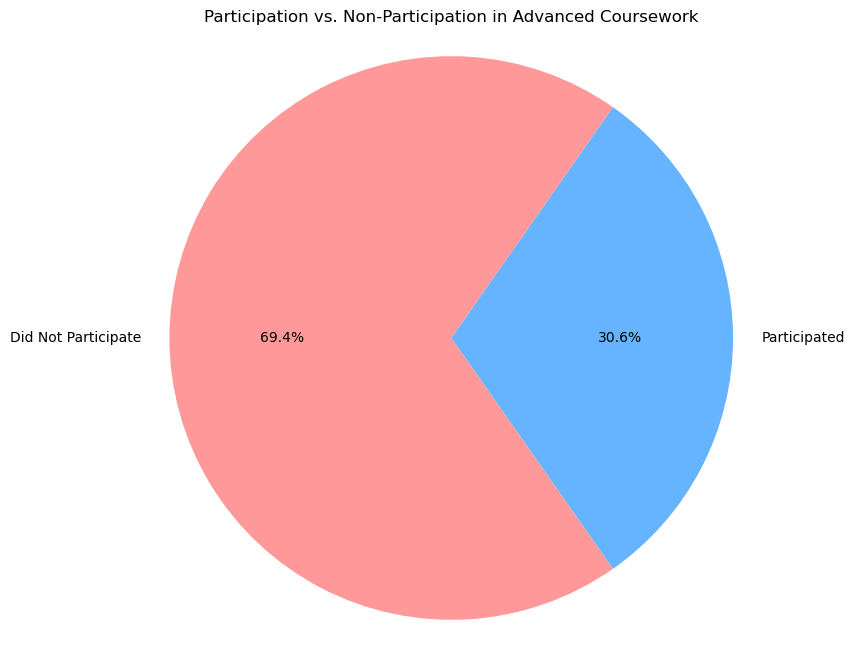

In [12]:
import matplotlib.pyplot as plt

# Calculate the number of students who did not participate in any advanced coursework
students_not_in_advanced_coursework = total_students - students_in_advanced_coursework

# Create a DataFrame for the pie chart
participation_summary = pd.DataFrame({
    'Participation Status': ['Participated', 'Did Not Participate'],
    'Number of Students': [students_in_advanced_coursework, students_not_in_advanced_coursework]
})

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(participation_summary['Number of Students'], labels=participation_summary['Participation Status'], autopct='%1.1f%%', startangle=305, colors=['#66b3ff', '#ff9999'])
plt.title('Participation vs. Non-Participation in Advanced Coursework')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


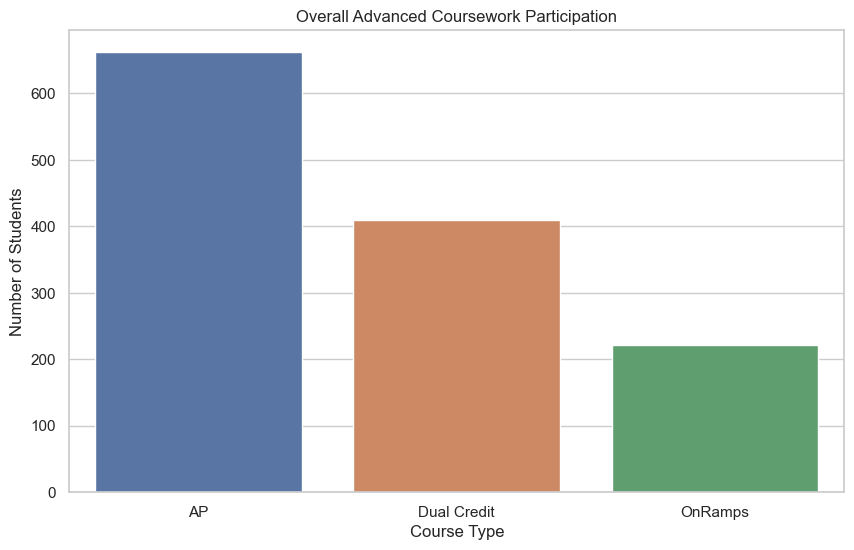

In [13]:

import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Overall Advanced Coursework Participation
overall_summary = pd.DataFrame({
    'Course Type': ['AP', 'Dual Credit', 'OnRamps'],
    'Total Students': [total_AP_participation, total_Dual_Credit_participation, total_OnRamps_participation]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Course Type', y='Total Students', data=overall_summary)
plt.title('Overall Advanced Coursework Participation')
plt.xlabel('Course Type')
plt.ylabel('Number of Students')
plt.show()

### Visualization
#### Participation Variations by Race/Ethnicity

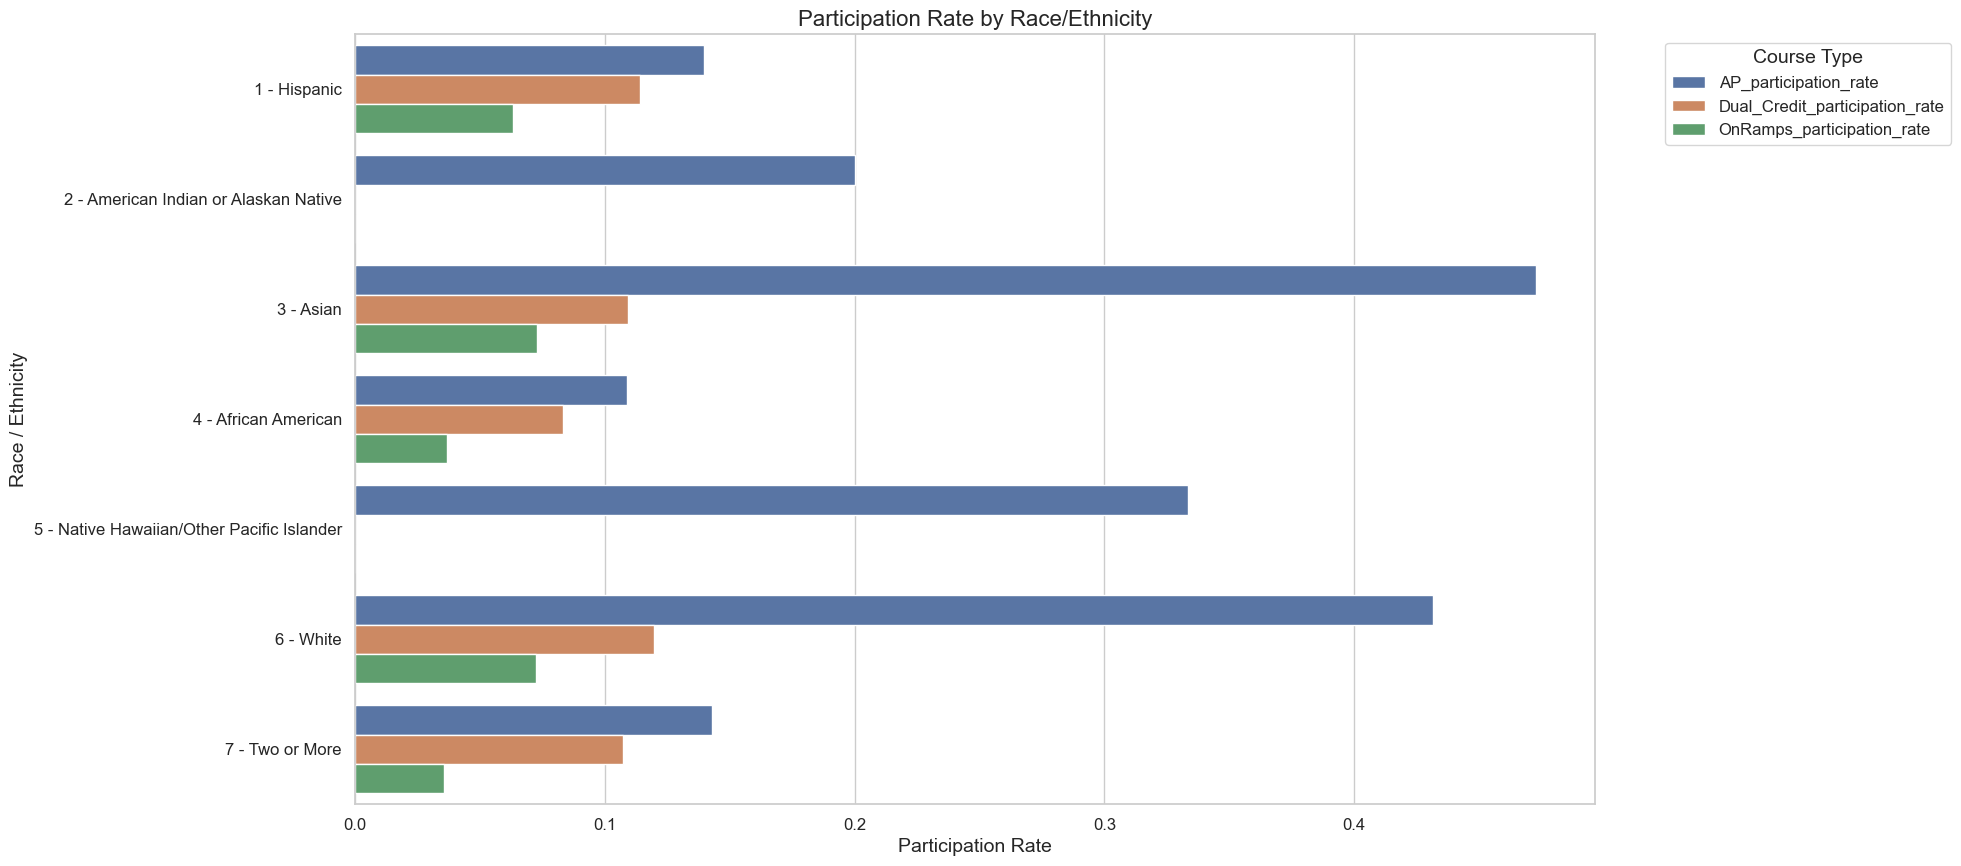

In [14]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Prepare data for visualization
participation_by_race_melted = participation_by_race.melt(id_vars='Race / Ethnicity', 
                                                          value_vars=['AP_participation_rate', 'Dual_Credit_participation_rate', 'OnRamps_participation_rate'],
                                                          var_name='Course Type', value_name='Participation Rate')

# Plot the participation variations by race/ethnicity
plt.figure(figsize=(16, 10))
sns.barplot(x='Participation Rate', y='Race / Ethnicity', hue='Course Type', data=participation_by_race_melted, dodge=True)
plt.title('Participation Rate by Race/Ethnicity', fontsize=16)
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Race / Ethnicity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Course Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.show()


#### Number of Students by Race/Ethnicity for Each Course Type

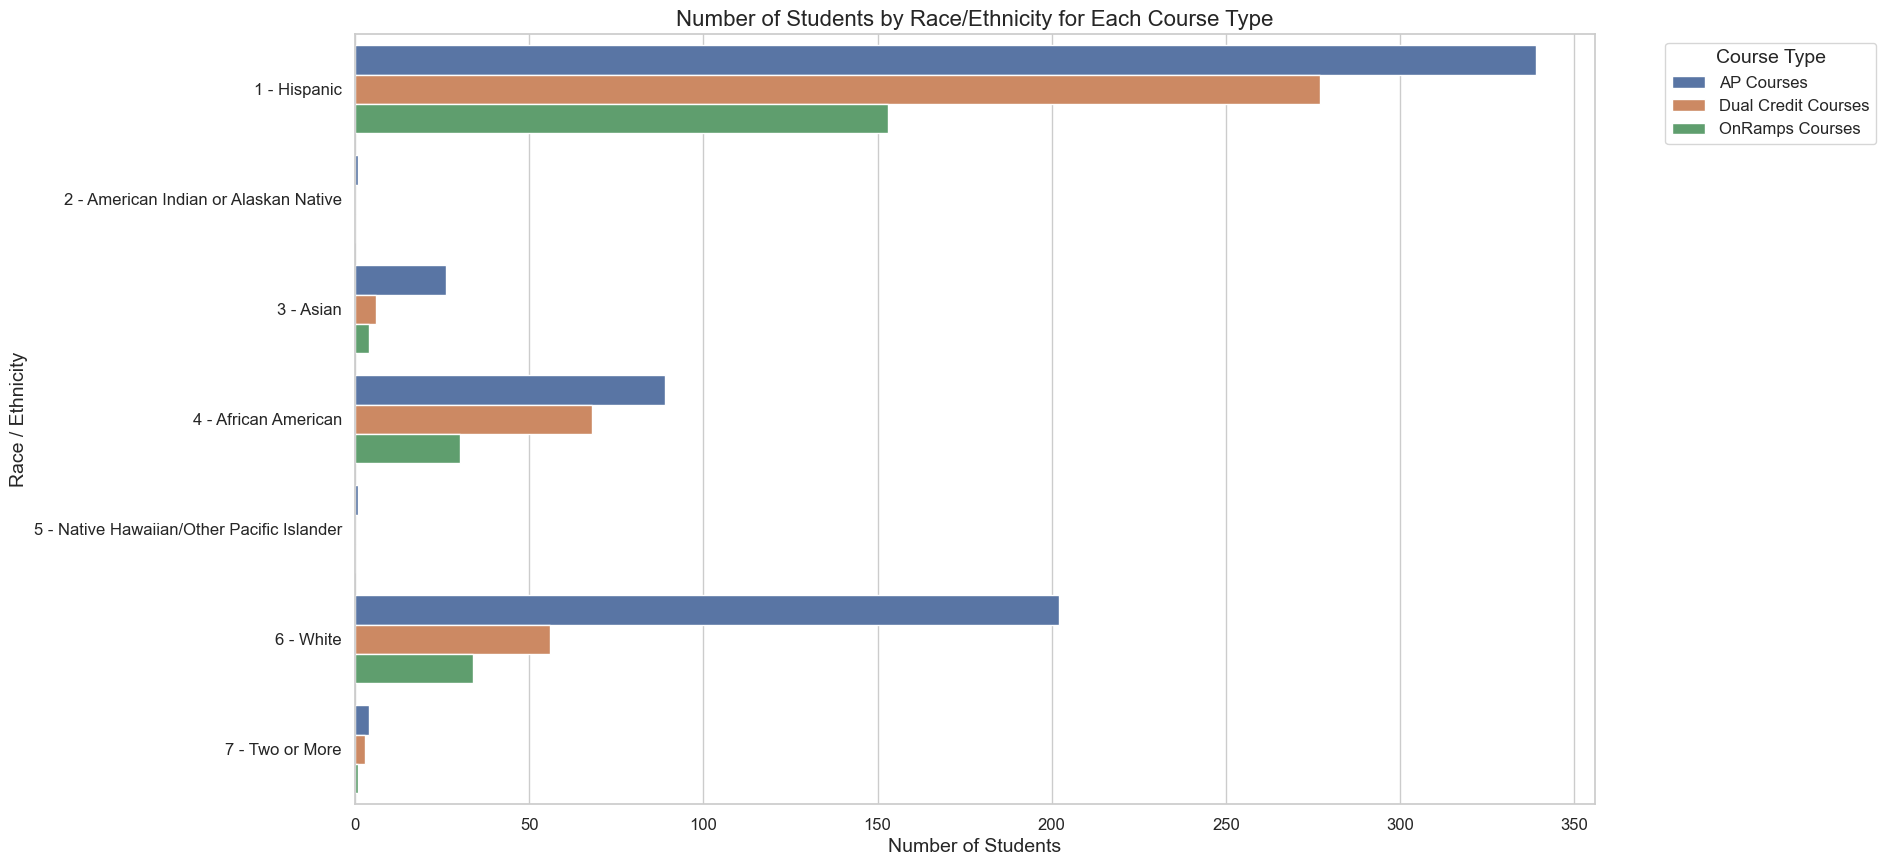

In [15]:
# Prepare data for visualization
participation_by_race_melted_count = participation_by_race.melt(id_vars='Race / Ethnicity', 
                                                                value_vars=['AP_participation', 'Dual_Credit_participation', 'OnRamps_participation'],
                                                                var_name='Course Type', value_name='Number of Students')

# Update course type names for clarity
participation_by_race_melted_count['Course Type'] = participation_by_race_melted_count['Course Type'].replace({
    'AP_participation': 'AP Courses',
    'Dual_Credit_participation': 'Dual Credit Courses',
    'OnRamps_participation': 'OnRamps Courses'
})

# Plot the number of students by race/ethnicity for each course type
plt.figure(figsize=(16, 10))
sns.barplot(x='Number of Students', y='Race / Ethnicity', hue='Course Type', data=participation_by_race_melted_count, dodge=True)
plt.title('Number of Students by Race/Ethnicity for Each Course Type', fontsize=16)
plt.xlabel('Number of Students', fontsize=14)
plt.ylabel('Race / Ethnicity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Course Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.show()


### Export the datasets
Exporting the datasets to generate better visualizations in Tableau/PowerPoint

In [16]:
import pandas as pd

# Assuming roster_with_advanced_courses, overall_summary, and participation_by_race are already defined

# Export the updated roster with advanced courses to a CSV file
roster_with_advanced_courses.to_csv('exported_roster_with_advanced_courses.csv', index=False)

# Export the overall participation summary to a CSV file
overall_summary.to_csv('exported_overall_summary.csv', index=False)

# Export the participation by race/ethnicity to a CSV file
participation_by_race.to_csv('exported_participation_by_race.csv', index=False)
